In [213]:
import mlflow
import mlflow.keras

mlflow.set_experiment("student_alcohol_uses_mlp")
mlflow.keras.autolog() 

Traceback (most recent call last):
  File "C:\Users\nbkka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mlflow\store\tracking\file_store.py", line 368, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "C:\Users\nbkka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mlflow\store\tracking\file_store.py", line 466, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "C:\Users\nbkka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mlflow\store\tracking\file_store.py", line 1636, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "C:\Users\nbkka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

In [214]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("../data/student_alcohol_data_for_mlp.csv")
nndf = df.copy()

# Create categorical columns
nndf['medu_cat'] = nndf['Medu'].apply(lambda x: 'Low' if x <= 2 else 'High')
nndf['fedu_cat'] = nndf['Fedu'].apply(lambda x: 'Low' if x <= 2 else 'High')

# Drop original Medu & Fedu once
nndf = nndf.drop(['Medu', 'Fedu'], axis=1)

# Create ndf copy (no need to drop again)
ndf = nndf.copy()

# Numeric columns
numeric_columns = ['age', 'absences', 'G1', 'G2', 'G3']

# Scaling
scaler = StandardScaler()
nndf[numeric_columns] = scaler.fit_transform(nndf[numeric_columns])


In [215]:
categorical_columns = ['medu_cat','fedu_cat','school', 'sex', 'address', 'famsize', 'Pstatus',
                       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                       'famsup', 'paid', 'activities', 'nursery', 'higher',
                       'internet', 'romantic', 'goout_degree', 'alc_level',
                       'freetime_degree', 'health_degree', 'famrel_degree','traveltime','studytime','failures']

nndf = pd.get_dummies(nndf, columns=categorical_columns, drop_first=True)


In [216]:
print(nndf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1044 non-null   float64
 1   absences             1044 non-null   float64
 2   G1                   1044 non-null   float64
 3   G2                   1044 non-null   float64
 4   G3                   1044 non-null   float64
 5   medu_cat_Low         1044 non-null   bool   
 6   fedu_cat_Low         1044 non-null   bool   
 7   school_MS            1044 non-null   bool   
 8   sex_M                1044 non-null   bool   
 9   address_U            1044 non-null   bool   
 10  famsize_LE3          1044 non-null   bool   
 11  Pstatus_T            1044 non-null   bool   
 12  Mjob_health          1044 non-null   bool   
 13  Mjob_other           1044 non-null   bool   
 14  Mjob_services        1044 non-null   bool   
 15  Mjob_teacher         1044 non-null   b

In [217]:
y = nndf["G3"]
X = nndf.drop("G3",axis =1)

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(
    X,y,test_size = 0.4, random_state = 1)

X_val,X_test,y_val,y_test = train_test_split(
    X_temp, y_temp ,test_size = 0.5, random_state = 1
)


In [219]:
import tensorflow as tf
import random
import numpy as np
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)



features = X_train.shape[1]
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (features,)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)])
    
model .compile(
    optimizer = "adam",
    loss = "mse",
    metrics = ['mae'] 
)

In [220]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[es]           
)
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test MSE:", test_loss)
print("Test MAE:", test_mae)



Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7486 - mae: 0.6320 - val_loss: 0.4287 - val_mae: 0.4107
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3607 - mae: 0.4306 - val_loss: 0.3572 - val_mae: 0.4221
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2972 - mae: 0.3944 - val_loss: 0.3103 - val_mae: 0.3672
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2453 - mae: 0.3510 - val_loss: 0.2869 - val_mae: 0.3488
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2401 - mae: 0.3487 - val_loss: 0.2731 - val_mae: 0.3475
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2172 - mae: 0.3338 - val_loss: 0.2622 - val_mae: 0.3358
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2054 - mae: 0.3218 - val_loss: 0.2522 - val_mae: 0.3182
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1891 - mae: 0.3049 - val_loss: 0.2484 - val_mae: 0.3177
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1892 - mae:

2025/11/29 19:36:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during keras autologging: Changing param values is not allowed. Param with key='epochs' was already logged with value='20' for run ID='f510aa2986a4409a8faca1a4d6eb5089'. Attempted logging new value '50'.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1077 - mae: 0.2280 
Test MSE: 0.10771386325359344
Test MAE: 0.22795850038528442


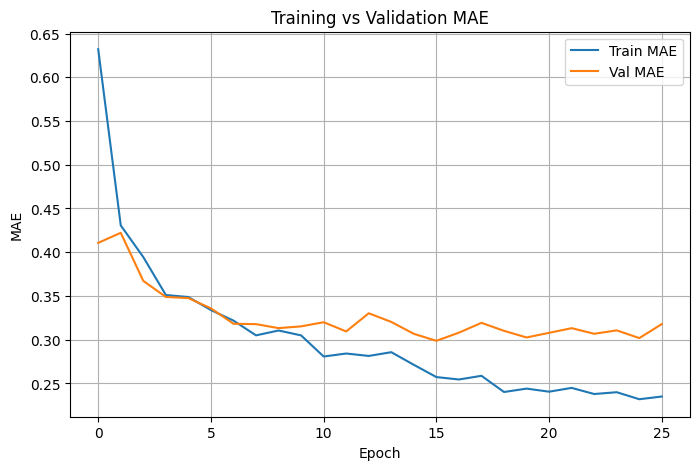

In [221]:
history.history
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(history.history['mae'],     label='Train MAE')
ax.plot(history.history['val_mae'], label='Val MAE')
ax.set_xlabel('Epoch')
ax.set_ylabel('MAE')
ax.set_title('Training vs Validation MAE')
ax.legend()
ax.grid(True)


mlflow.log_figure(fig, "figures/regression_mae.png")

plt.show()

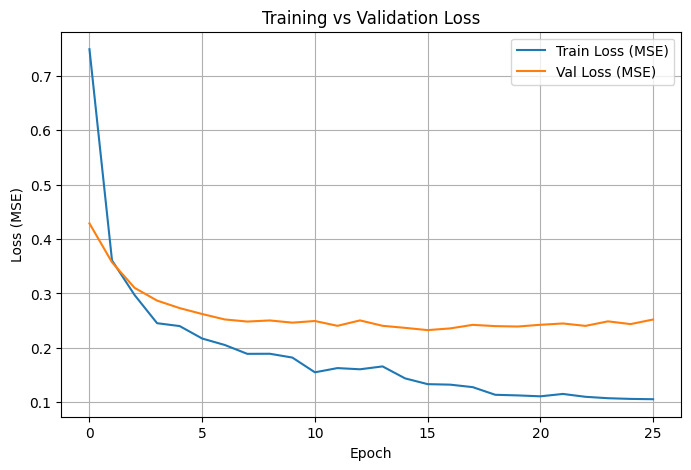

In [222]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


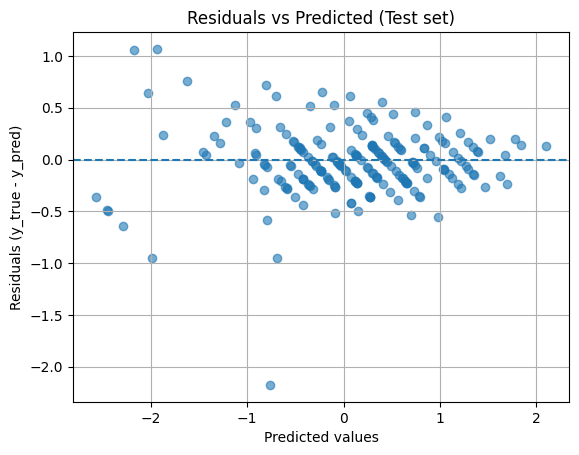

In [223]:
import numpy as np
import matplotlib.pyplot as plt


y_pred = model.predict(X_test).reshape(-1)   
y_true = np.array(y_test).reshape(-1)


residuals = y_true - y_pred


plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, linestyle='--')  

plt.xlabel("Predicted values")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residuals vs Predicted (Test set)")
plt.grid(True)
plt.show()

In [224]:
import numpy as np


X_test_df = X_test              
y_test_ser = y_test

X_test_np = np.asarray(X_test_df, dtype="float32")
y_test_np = np.asarray(y_test_ser, dtype="float32")

baseline_loss = test_loss       
n_features = X_test_np.shape[1]
feature_means = X_test_np.mean(axis=0)


In [225]:
import numpy as np

X_test_np = np.asarray(X_test, dtype="float32")
y_test_np = np.asarray(y_test, dtype="float32").reshape(-1)   
y_pred_base = model.predict(X_test_np).reshape(-1)
baseline_mse = np.mean((y_test_np - y_pred_base) ** 2)
print("Baseline MSE (manual):", baseline_mse)
n_features = X_test_np.shape[1]
feature_means = X_test_np.mean(axis=0)
importances = []

for j in range(n_features):
    X_test_ablate = X_test_np.copy()
    
    # ablate feature j by replacing it with its mean
    X_test_ablate[:, j] = feature_means[j]
    
    # predict with ablated feature
    y_pred_ablate = model.predict(X_test_ablate).reshape(-1)
    mse_ablate = np.mean((y_test_np - y_pred_ablate) ** 2)
    
    importance = mse_ablate - baseline_mse
    importances.append(importance)
    print(f"Feature {j}: ΔMSE = {importance:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Baseline MSE (manual): 0.107713856
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Feature 0: ΔMSE = 0.0104
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Feature 1: ΔMSE = 0.0104
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Feature 2: ΔMSE = 0.0509
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Feature 3: ΔMSE = 0.4455
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Feature 4: ΔMSE = -0.0004
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Feature 5: ΔMSE = -0.0009
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Feature 6: ΔMSE = 0.0012
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Feature 7: ΔMSE = -0.0022
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Feature 8: ΔMSE = -0.0024
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Feature 9: ΔMSE = -0.0028
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Feature 10: ΔMSE = -0.0015
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Feature 11: ΔMSE = -0.0002
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Feature 12: ΔMSE = -0.0009
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Feature 13: ΔMSE = -0.0042
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/

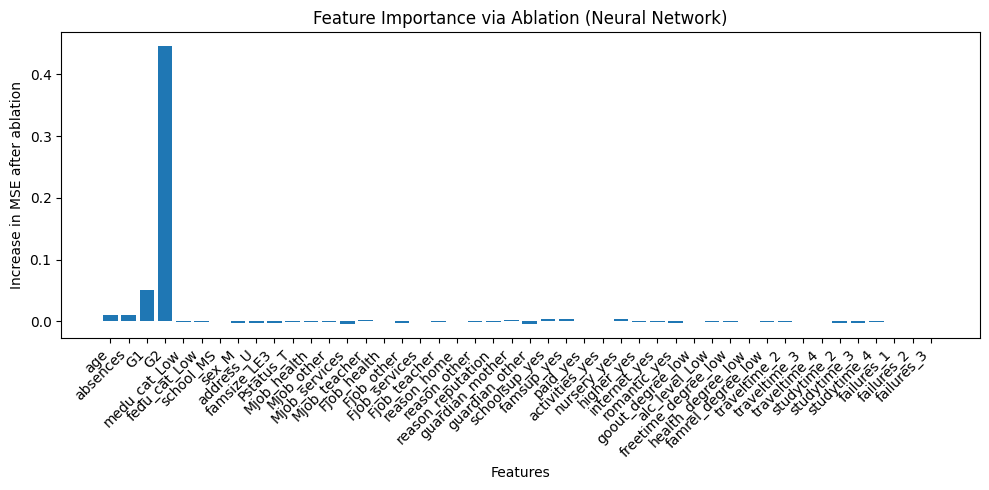

In [226]:
import matplotlib.pyplot as plt

try:
    feature_names = list(X_test.columns)
except AttributeError:
    feature_names = [f"feat_{i}" for i in range(n_features)]

plt.figure(figsize=(10, 5))
plt.bar(range(n_features), importances)
plt.xticks(range(n_features), feature_names, rotation=45, ha='right')
plt.ylabel("Increase in MSE after ablation")
plt.xlabel("Features")
plt.title("Feature Importance via Ablation (Neural Network)")
plt.tight_layout()
plt.show()


In [227]:
print(nndf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1044 non-null   float64
 1   absences             1044 non-null   float64
 2   G1                   1044 non-null   float64
 3   G2                   1044 non-null   float64
 4   G3                   1044 non-null   float64
 5   medu_cat_Low         1044 non-null   bool   
 6   fedu_cat_Low         1044 non-null   bool   
 7   school_MS            1044 non-null   bool   
 8   sex_M                1044 non-null   bool   
 9   address_U            1044 non-null   bool   
 10  famsize_LE3          1044 non-null   bool   
 11  Pstatus_T            1044 non-null   bool   
 12  Mjob_health          1044 non-null   bool   
 13  Mjob_other           1044 non-null   bool   
 14  Mjob_services        1044 non-null   bool   
 15  Mjob_teacher         1044 non-null   b

In [228]:
y = nndf['alc_level_Low']                  
X = nndf.drop('alc_level_Low', axis=1) 
X_train_full, X_temp, y_train_full, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


In [229]:
import tensorflow as tf

def f1_score(y_true, y_pred):
    # make both numeric tensors
    y_true = tf.cast(y_true, tf.float32)
    # threshold predictions at 0.5
    y_pred = tf.cast(tf.greater_equal(y_pred, 0.5), tf.float32)

    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1.0 - y_true) * y_pred)
    fn = tf.reduce_sum(y_true * (1.0 - y_pred))

    precision = tp / (tp + fp + 1e-7)
    recall    = tp / (tp + fn + 1e-7)

    f1 = 2 * precision * recall / (precision + recall + 1e-7)
    return f1


In [230]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

num_features = X_train_full.shape[1]

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(num_features,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',     
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'), 
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        f1_score
    ]
)


In [231]:
history = model.fit(
    X_train_full,
    y_train_full,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    
)

2025/11/29 19:36:33 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8680 - auc: 0.4676 - f1_score: 0.9284 - loss: 0.4342 - precision: 0.8930 - recall: 0.9688 - val_accuracy: 0.8968 - val_auc: 0.6664 - val_f1_score: 0.9453 - val_loss: 0.3177 - val_precision: 0.8968 - val_recall: 1.0000
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8960 - auc: 0.5829 - f1_score: 0.9447 - loss: 0.3413 - precision: 0.8960 - recall: 1.0000 - val_accuracy: 0.8968 - val_auc: 0.7400 - val_f1_score: 0.9453 - val_loss: 0.3099 - val_precision: 0.8968 - val_recall: 1.0000
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8960 - auc: 0.6662 - f1_score: 0.9447 - loss: 0.3201 - precision: 0.8960 - recall: 1.0000 - val_accuracy: 0.8968 - val_auc: 0.7968 - val_f1_score: 0.9453 - val_loss: 0.2983 - val_precision: 0.8968 - val_recall: 1.0000
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8960 - auc: 0.7265 - f1_score: 0.9447 - loss: 0.3059 - precision: 0.8960 - recall: 1.0

2025/11/29 19:36:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 19:38:10 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\nbkka\AppData\Local\Temp\tmp_85fkmh8\model, flavor: keras). Fall back to return ['keras==3.12.0']. Set logging level to DEBUG to see the full traceback. 


In [232]:
results = model.evaluate(X_test, y_test)
print(results)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9282 - auc: 0.9263 - f1_score: 0.9604 - loss: 0.1900 - precision: 0.9433 - recall: 0.9786 
[0.19003017246723175, 0.9282296895980835, 0.9263490438461304, 0.9432989954948425, 0.9786096215248108, 0.9604150652885437]


In [233]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Predictions
pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, pred)

TN, FP, FN, TP = cm.ravel()

df_cm = pd.DataFrame(
    [[TN, FP],
     [FN, TP]],
    index=['Actual 0', 'Actual 1'],
    columns=['Pred 0', 'Pred 1']
)

print("Confusion Matrix:")
display(df_cm)

print("\nValues:")
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"TP = {TP}")



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Confusion Matrix:


,Pred 0,Pred 1
Actual 0,11,11
Actual 1,4,183



Values:
TN = 11
FP = 11
FN = 4
TP = 183


In [234]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train_full, y_train_full)

print("Before oversampling:\n", y_train_full.value_counts())
print("\nAfter oversampling:\n", y_train_over.value_counts())


Before oversampling:
 alc_level_Low
True     561
False     65
Name: count, dtype: int64

After oversampling:
 alc_level_Low
True     561
False    561
Name: count, dtype: int64


In [235]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train_full)
weights = compute_class_weight('balanced', classes=classes, y=y_train_full)

class_weights = {int(c): w for c, w in zip(classes, weights)}
print("\nClass weights:", class_weights)


Class weights: {0: np.float64(4.815384615384615), 1: np.float64(0.5579322638146168)}


In [236]:
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

num_features = X_train_over.shape[1]

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(num_features,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',     
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'), 
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        f1_score
    ]
)


In [237]:
history = model.fit(
    X_train_over,
    y_train_over,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
    
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6070 - auc: 0.6573 - f1_score: 0.5768 - loss: 0.6532 - precision: 0.6091 - recall: 0.5971 - val_accuracy: 0.8421 - val_auc: 0.7860 - val_f1_score: 0.9033 - val_loss: 0.4914 - val_precision: 0.9326 - val_recall: 0.8877
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7487 - auc: 0.8239 - f1_score: 0.7472 - loss: 0.5378 - precision: 0.7409 - recall: 0.7647 - val_accuracy: 0.8660 - val_auc: 0.7918 - val_f1_score: 0.9184 - val_loss: 0.3911 - val_precision: 0.9344 - val_recall: 0.9144
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8084 - auc: 0.8912 - f1_score: 0.8022 - loss: 0.4389 - precision: 0.8168 - recall: 0.7950 - val_accuracy: 0.8708 - val_auc: 0.8059 - val_f1_score: 0.9245 - val_loss: 0.3336 - val_precision: 0.9301 - val_recall: 0.9251
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8529 - auc: 0.9215 - f1_score: 0.8438 - loss: 0.3694 - precision: 0.8722 - recall: 0.8271

2025/11/29 19:38:17 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during keras autologging: Changing param values is not allowed. Param with key='validation_split' was already logged with value='0.2' for run ID='f510aa2986a4409a8faca1a4d6eb5089'. Attempted logging new value '0.0'.


In [238]:
results = model.evaluate(X_test, y_test)
print(results)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9234 - auc: 0.9026 - f1_score: 0.9576 - loss: 0.2578 - precision: 0.9476 - recall: 0.9679 
[0.257828027009964, 0.9234449863433838, 0.902649462223053, 0.9476439952850342, 0.9679144620895386, 0.9576273560523987]


In [239]:

# Predictions
pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, pred)

TN, FP, FN, TP = cm.ravel()

df_cm = pd.DataFrame(
    [[TN, FP],
     [FN, TP]],
    index=['Actual 0', 'Actual 1'],
    columns=['Pred 0', 'Pred 1']
)

print("Confusion Matrix:")
display(df_cm)

print("\nValues:")
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"TP = {TP}")



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Confusion Matrix:


,Pred 0,Pred 1
Actual 0,12,10
Actual 1,6,181



Values:
TN = 12
FP = 10
FN = 6
TP = 181


In [240]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

num_features = X_train_full.shape[1]

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(num_features,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',     
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'), 
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        f1_score
    ]
)


In [241]:
history = model.fit(
    X_train_full,
    y_train_full,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.6800 - auc: 0.4241 - f1_score: 0.8019 - loss: 0.7318 - precision: 0.8871 - recall: 0.7366 - val_accuracy: 0.7857 - val_auc: 0.6583 - val_f1_score: 0.8752 - val_loss: 0.6185 - val_precision: 0.9135 - val_recall: 0.8407
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6300 - auc: 0.6255 - f1_score: 0.7535 - loss: 0.6742 - precision: 0.9256 - recall: 0.6384 - val_accuracy: 0.6667 - val_auc: 0.7447 - val_f1_score: 0.7809 - val_loss: 0.6382 - val_precision: 0.9494 - val_recall: 0.6637
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6620 - auc: 0.7369 - f1_score: 0.7711 - loss: 0.6280 - precision: 0.9604 - recall: 0.6496 - val_accuracy: 0.7381 - val_auc: 0.7760 - val_f1_score: 0.8340 - val_loss: 0.5932 - val_precision: 0.9651 - val_recall: 0.7345
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7680 - auc: 0.8054 - f1_score: 0.8559 - loss: 0.5849 - precision: 0.9586 - recall: 0.774

2025/11/29 19:38:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during keras autologging: Changing param values is not allowed. Param with key='class_weight' was already logged with value='None' for run ID='f510aa2986a4409a8faca1a4d6eb5089'. Attempted logging new value '{0: np.float64(4.815384615384615), 1: np.float64(0.5579322638146168)}'.


In [242]:
results = model.evaluate(X_test, y_test)
print(results)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9043 - auc: 0.9351 - f1_score: 0.9455 - loss: 0.2447 - precision: 0.9718 - recall: 0.9198 
[0.24468030035495758, 0.9043062329292297, 0.935099720954895, 0.9717513918876648, 0.9197860956192017, 0.9454664587974548]


In [243]:

# Predictions
pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, pred)

TN, FP, FN, TP = cm.ravel()

df_cm = pd.DataFrame(
    [[TN, FP],
     [FN, TP]],
    index=['Actual 0', 'Actual 1'],
    columns=['Pred 0', 'Pred 1']
)

print("Confusion Matrix:")
display(df_cm)

print("\nValues:")
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"TP = {TP}")



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Confusion Matrix:


,Pred 0,Pred 1
Actual 0,17,5
Actual 1,15,172



Values:
TN = 17
FP = 5
FN = 15
TP = 172


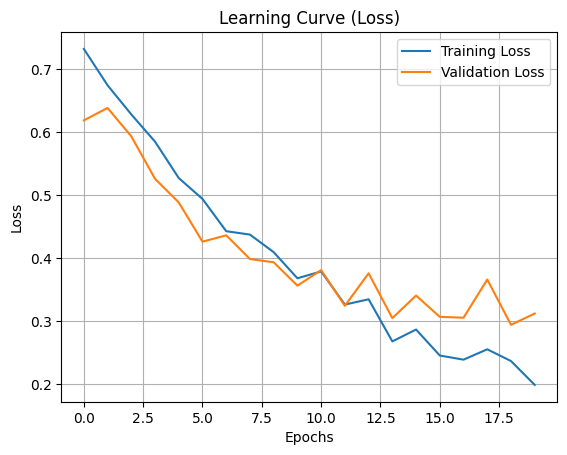

In [244]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve (Loss)')
plt.legend()
plt.grid(True)
plt.show()

In [175]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

l2_reg = tf.keras.regularizers.l2(0.001)
num_features = X_train_full.shape[1]

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(num_features,)),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=l2_reg),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=l2_reg),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',     
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'), 
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        f1_score
    ]
)


In [176]:
history = model.fit(
    X_train_full,
    y_train_full,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.6800 - auc: 0.4260 - f1_score: 0.8019 - loss: 0.8783 - precision: 0.8871 - recall: 0.7366 - val_accuracy: 0.7857 - val_auc: 0.6613 - val_f1_score: 0.8752 - val_loss: 0.7629 - val_precision: 0.9135 - val_recall: 0.8407
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6340 - auc: 0.6261 - f1_score: 0.7569 - loss: 0.8158 - precision: 0.9260 - recall: 0.6429 - val_accuracy: 0.6587 - val_auc: 0.7423 - val_f1_score: 0.7740 - val_loss: 0.7777 - val_precision: 0.9487 - val_recall: 0.6549
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6520 - auc: 0.7351 - f1_score: 0.7622 - loss: 0.7661 - precision: 0.9536 - recall: 0.6429 - val_accuracy: 0.7381 - val_auc: 0.7750 - val_f1_score: 0.8340 - val_loss: 0.7296 - val_precision: 0.9651 - val_recall: 0.7345
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7680 - auc: 0.8046 - f1_score: 0.8561 - loss: 0.7196 - precision: 0.9586 - recall: 0.

2025/11/29 19:02:18 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during keras autologging: Changing param values is not allowed. Param with key='class_weight' was already logged with value='None' for run ID='f510aa2986a4409a8faca1a4d6eb5089'. Attempted logging new value '{0: np.float64(4.815384615384615), 1: np.float64(0.5579322638146168)}'.


In [177]:
results = model.evaluate(X_test, y_test)
print(results)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8995 - auc: 0.9304 - f1_score: 0.9409 - loss: 0.3728 - precision: 0.9716 - recall: 0.9144
[0.3727785646915436, 0.89952152967453, 0.9303597211837769, 0.9715909361839294, 0.9144384860992432, 0.9408668875694275]


In [178]:
pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, pred)

TN, FP, FN, TP = cm.ravel()

df_cm = pd.DataFrame(
    [[TN, FP],
     [FN, TP]],
    index=['Actual 0', 'Actual 1'],
    columns=['Pred 0', 'Pred 1']
)

print("Confusion Matrix:")
display(df_cm)

print("\nValues:")
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"TP = {TP}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Confusion Matrix:


,Pred 0,Pred 1
Actual 0,17,5
Actual 1,16,171



Values:
TN = 17
FP = 5
FN = 16
TP = 171


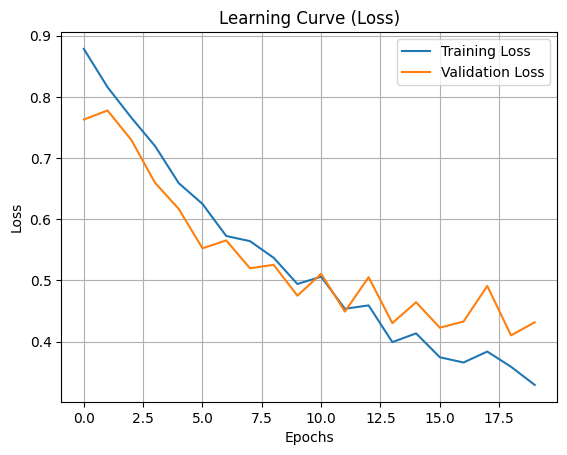

In [179]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve (Loss)')
plt.legend()
plt.grid(True)
plt.show()

In [245]:

import numpy as np

X_test_np = np.asarray(X_test, dtype="float32")
y_test_arr = np.asarray(y_test)

# handle all cases: labels or one-hot
if y_test_arr.ndim == 1:
    # already class labels like [0, 2, 1, ...]
    y_test_cls = y_test_arr.astype(int)
elif y_test_arr.ndim == 2 and y_test_arr.shape[1] == 1:
    # shape (n,1) → squeeze to 1D labels
    y_test_cls = y_test_arr[:, 0].astype(int)
else:
    # true one-hot → take argmax
    y_test_cls = np.argmax(y_test_arr, axis=1)


In [246]:
def nn_accuracy(model, X, y_true_cls):
    y_proba = model.predict(X, verbose=0)

    if y_proba.ndim == 1 or y_proba.shape[1] == 1:  # binary sigmoid
        y_pred_cls = (y_proba.ravel() >= 0.5).astype(int)
    else:                                           # softmax multi-class
        y_pred_cls = np.argmax(y_proba, axis=1)

    return np.mean(y_pred_cls == y_true_cls)

In [247]:
baseline_acc = nn_accuracy(model, X_test_np, y_test_cls)
print("Baseline accuracy:", baseline_acc)


Baseline accuracy: 0.9043062200956937


In [248]:
n_features = X_test_np.shape[1]
feature_means = X_test_np.mean(axis=0)
importances = []

for j in range(n_features):
    X_ablate = X_test_np.copy()
    X_ablate[:, j] = feature_means[j]  

    acc_ablate = nn_accuracy(model, X_ablate, y_test_cls)
    importance = baseline_acc - acc_ablate
    importances.append(importance)
    print(f"Feature {j}: Δaccuracy = {importance:.4f}")

Feature 0: Δaccuracy = 0.0048
Feature 1: Δaccuracy = 0.0191
Feature 2: Δaccuracy = 0.0000
Feature 3: Δaccuracy = 0.0048
Feature 4: Δaccuracy = -0.0048
Feature 5: Δaccuracy = 0.0000
Feature 6: Δaccuracy = 0.0096
Feature 7: Δaccuracy = 0.0000
Feature 8: Δaccuracy = 0.0144
Feature 9: Δaccuracy = 0.0144
Feature 10: Δaccuracy = -0.0048
Feature 11: Δaccuracy = -0.0048
Feature 12: Δaccuracy = 0.0096
Feature 13: Δaccuracy = -0.0048
Feature 14: Δaccuracy = 0.0048
Feature 15: Δaccuracy = 0.0000
Feature 16: Δaccuracy = 0.0000
Feature 17: Δaccuracy = 0.0048
Feature 18: Δaccuracy = 0.0144
Feature 19: Δaccuracy = 0.0000
Feature 20: Δaccuracy = 0.0048
Feature 21: Δaccuracy = -0.0096
Feature 22: Δaccuracy = 0.0000
Feature 23: Δaccuracy = 0.0144
Feature 24: Δaccuracy = 0.0000
Feature 25: Δaccuracy = 0.0096
Feature 26: Δaccuracy = -0.0048
Feature 27: Δaccuracy = 0.0048
Feature 28: Δaccuracy = 0.0000
Feature 29: Δaccuracy = 0.0000
Feature 30: Δaccuracy = 0.0000
Feature 31: Δaccuracy = 0.0096
Feature 32: 

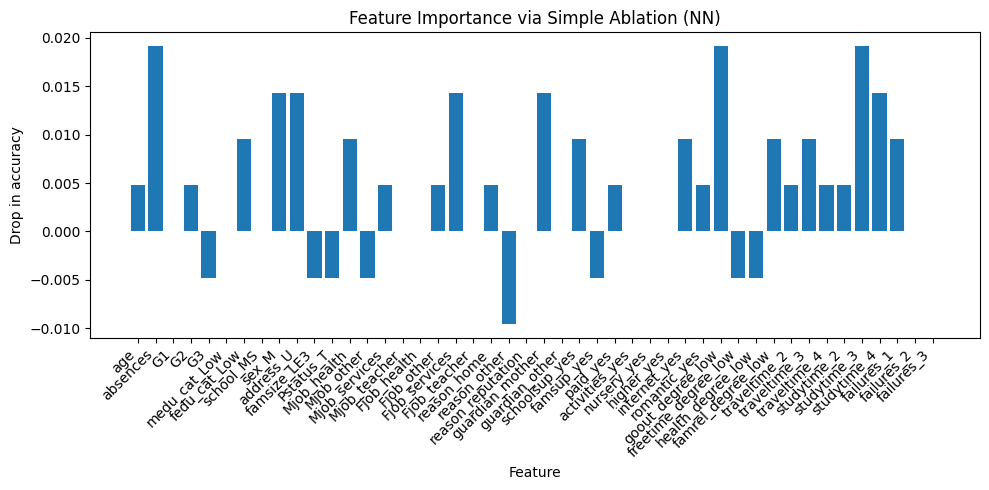

In [249]:
try:
    feature_names = list(X_test.columns)
except AttributeError:
    feature_names = [f"feature_{i}" for i in range(n_features)]

plt.figure(figsize=(10, 5))
plt.bar(range(n_features), importances)
plt.xticks(range(n_features), feature_names, rotation=45, ha='right')
plt.ylabel("Drop in accuracy")
plt.xlabel("Feature")
plt.title("Feature Importance via Simple Ablation (NN)")
plt.tight_layout()
plt.show()

In [136]:
focal_loss = tf.keras.losses.BinaryFocalCrossentropy(
    gamma=2.0,
    from_logits=False
)


In [137]:
model.compile(
    optimizer='adam',
    loss=focal_loss,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        f1_score
    ]
)

In [138]:
history = model.fit(
    X_train_full,
    y_train_full,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9140 - auc: 0.9685 - f1_score: 0.9506 - loss: 0.1831 - precision: 0.9856 - recall: 0.9174 - val_accuracy: 0.8810 - val_auc: 0.8972 - val_f1_score: 0.9316 - val_loss: 0.2495 - val_precision: 0.9537 - val_recall: 0.9115
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8980 - auc: 0.9814 - f1_score: 0.9402 - loss: 0.1618 - precision: 0.9901 - recall: 0.8951 - val_accuracy: 0.9048 - val_auc: 0.9003 - val_f1_score: 0.9468 - val_loss: 0.2109 - val_precision: 0.9550 - val_recall: 0.9381
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9340 - auc: 0.9808 - f1_score: 0.9623 - loss: 0.1515 - precision: 0.9929 - recall: 0.9330 - val_accuracy: 0.8810 - val_auc: 0.8928 - val_f1_score: 0.9325 - val_loss: 0.2028 - val_precision: 0.9537 - val_recall: 0.9115
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9200 - auc: 0.9768 - f1_score: 0.9535 - loss: 0.1506 - precision: 0.9951 - recall: 0.

2025/11/29 18:56:05 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during keras autologging: Changing param values is not allowed. Param with key='class_weight' was already logged with value='None' for run ID='f510aa2986a4409a8faca1a4d6eb5089'. Attempted logging new value '{0: np.float64(4.815384615384615), 1: np.float64(0.5579322638146168)}'.


In [139]:
results = model.evaluate(X_test, y_test)
print(results)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9282 - auc: 0.9332 - f1_score: 0.9599 - loss: 0.1382 - precision: 0.9574 - recall: 0.9626
[0.13815772533416748, 0.9282296895980835, 0.9331550598144531, 0.957446813583374, 0.9625668525695801, 0.9599094390869141]


In [140]:
pred = (model.predict(X_test) > 0.5
       ).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, pred)

TN, FP, FN, TP = cm.ravel()

df_cm = pd.DataFrame(
    [[TN, FP],
     [FN, TP]],
    index=['Actual 0', 'Actual 1'],
    columns=['Pred 0', 'Pred 1']
)

print("Confusion Matrix:")
display(df_cm)

print("\nValues:")
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"TP = {TP}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Confusion Matrix:


,Pred 0,Pred 1
Actual 0,14,8
Actual 1,7,180



Values:
TN = 14
FP = 8
FN = 7
TP = 180


In [141]:
from imblearn.over_sampling import SMOTENC


y = ndf['alc_level']
y = pd.get_dummies(y, columns='alc_level', drop_first=True)
X = ndf.drop('alc_level', axis=1)


X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42,
    stratify=y
)

print('Before SMOTENC (train):')
print(y_train.value_counts())


cat_cols = categorical_columns
cat_cols.remove("alc_level")
num_cols = numeric_columns

print('\nCategorical columns:', list(cat_cols))
print('Numeric columns    :', list(num_cols))


categorical_idx = [X_train_raw.columns.get_loc(c) for c in cat_cols]


sm = SMOTENC(
    categorical_features=categorical_idx,
    random_state=42
)

X_train_smote, y_train_smote = sm.fit_resample(X_train_raw, y_train)

print('\nAfter SMOTENC (train):')
print(y_train_smote.value_counts())

Before SMOTENC (train):
Low  
True     561
False     65
Name: count, dtype: int64

Categorical columns: ['medu_cat', 'fedu_cat', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout_degree', 'freetime_degree', 'health_degree', 'famrel_degree', 'traveltime', 'studytime', 'failures']
Numeric columns    : ['age', 'absences', 'G1', 'G2', 'G3']

After SMOTENC (train):
Low  
False    561
True     561
Name: count, dtype: int64


In [142]:
print(len(X_test_raw), len(y_test))

418 418


In [143]:
scaler = StandardScaler()


X_train_smote[numeric_columns] = scaler.fit_transform(
    X_train_smote[numeric_columns]
)


X_test_raw[numeric_columns] = scaler.transform(
    X_test_raw[numeric_columns]
)


X_train_enc = pd.get_dummies(
    X_train_smote,
    columns=categorical_columns,
    drop_first=True
)

X_test_enc = pd.get_dummies(
    X_test_raw,
    columns=categorical_columns,
    drop_first=True
)
X_train_final, X_test_final = X_train_enc.align(
    X_test_enc,
    join="left",
    axis=1,
    fill_value=0
)

In [144]:
X_val,X_test,y_val,y_test = train_test_split(
    X_test_enc, y_test ,test_size = 0.5, random_state = 1
)


In [145]:
model.compile(
    optimizer='adam',
    loss=focal_loss,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        f1_score
    ]
)
history = model.fit(
    X_train_final,
    y_train_smote,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
    
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9225 - auc: 0.9743 - f1_score: 0.9213 - loss: 0.1319 - precision: 0.9278 - recall: 0.9162 - val_accuracy: 0.8517 - val_auc: 0.7914 - val_f1_score: 0.9181 - val_loss: 0.2024 - val_precision: 0.9140 - val_recall: 0.9189
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9501 - auc: 0.9865 - f1_score: 0.9489 - loss: 0.1079 - precision: 0.9599 - recall: 0.9394 - val_accuracy: 0.8612 - val_auc: 0.7803 - val_f1_score: 0.9247 - val_loss: 0.2089 - val_precision: 0.9105 - val_recall: 0.9351
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9510 - auc: 0.9896 - f1_score: 0.9506 - loss: 0.1010 - precision: 0.9583 - recall: 0.9430 - val_accuracy: 0.8565 - val_auc: 0.7766 - val_f1_score: 0.9216 - val_loss: 0.2050 - val_precision: 0.9101 - val_recall: 0.9297
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9670 - auc: 0.9936 - f1_score: 0.9658 - loss: 0.0907 - precision: 0.9799 - recall: 0.9

2025/11/29 18:56:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during keras autologging: Changing param values is not allowed. Param with key='validation_split' was already logged with value='0.2' for run ID='f510aa2986a4409a8faca1a4d6eb5089'. Attempted logging new value '0.0'.


In [146]:
results = model.evaluate(X_test, y_test)
print(results)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9139 - auc: 0.9062 - f1_score: 0.9521 - loss: 0.1103 - precision: 0.9572 - recall: 0.9471
[0.1103154718875885, 0.9138755798339844, 0.9062169194221497, 0.9572192430496216, 0.9470899701118469, 0.952118992805481]


In [147]:
pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, pred)

TN, FP, FN, TP = cm.ravel()

df_cm = pd.DataFrame(
    [[TN, FP],
     [FN, TP]],
    index=['Actual 0', 'Actual 1'],
    columns=['Pred 0', 'Pred 1']
)

print("Confusion Matrix:")
display(df_cm)

print("\nValues:")
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"TP = {TP}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Confusion Matrix:


,Pred 0,Pred 1
Actual 0,12,8
Actual 1,10,179



Values:
TN = 12
FP = 8
FN = 10
TP = 179
